# Avocado Average Price Prediction and Region Prediction:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset:-

In [2]:
av=pd.read_csv(r'C:\Users\User\Downloads\avocado.csv')
av

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
av.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [18]:
av.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [19]:
av.shape

(18249, 13)

# Data Cleaning:-

In [20]:
av.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Above observations shows that no null values are present in our data.

In [22]:
av.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Above observations shows that 'Date','type' and 'region' are object type and rest all columns are interger and float type.

In [23]:
av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [28]:
av.describe()

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# EDA:-

In [3]:
#renaming the columns for better understanding

av.rename(columns={'4046':'Small HASS sold',
                          '4225':'Large HASS sold',
                          '4770':'XLarge HASS sold'}, 
                 inplace=True)

In [4]:
av

,Date,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [26]:
av.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [27]:
av.type.unique()

array(['conventional', 'organic'], dtype=object)

There are two types of avcado - 'conventional' and 'organic'.

In [5]:
# changing the datatypes;

from sklearn.preprocessing import LabelEncoder

In [6]:
le=LabelEncoder()

val=['type','region']
for i in val:
    av[i]=le.fit_transform(av[i])

In [7]:
av

,Date,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [32]:
av.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [33]:
av.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

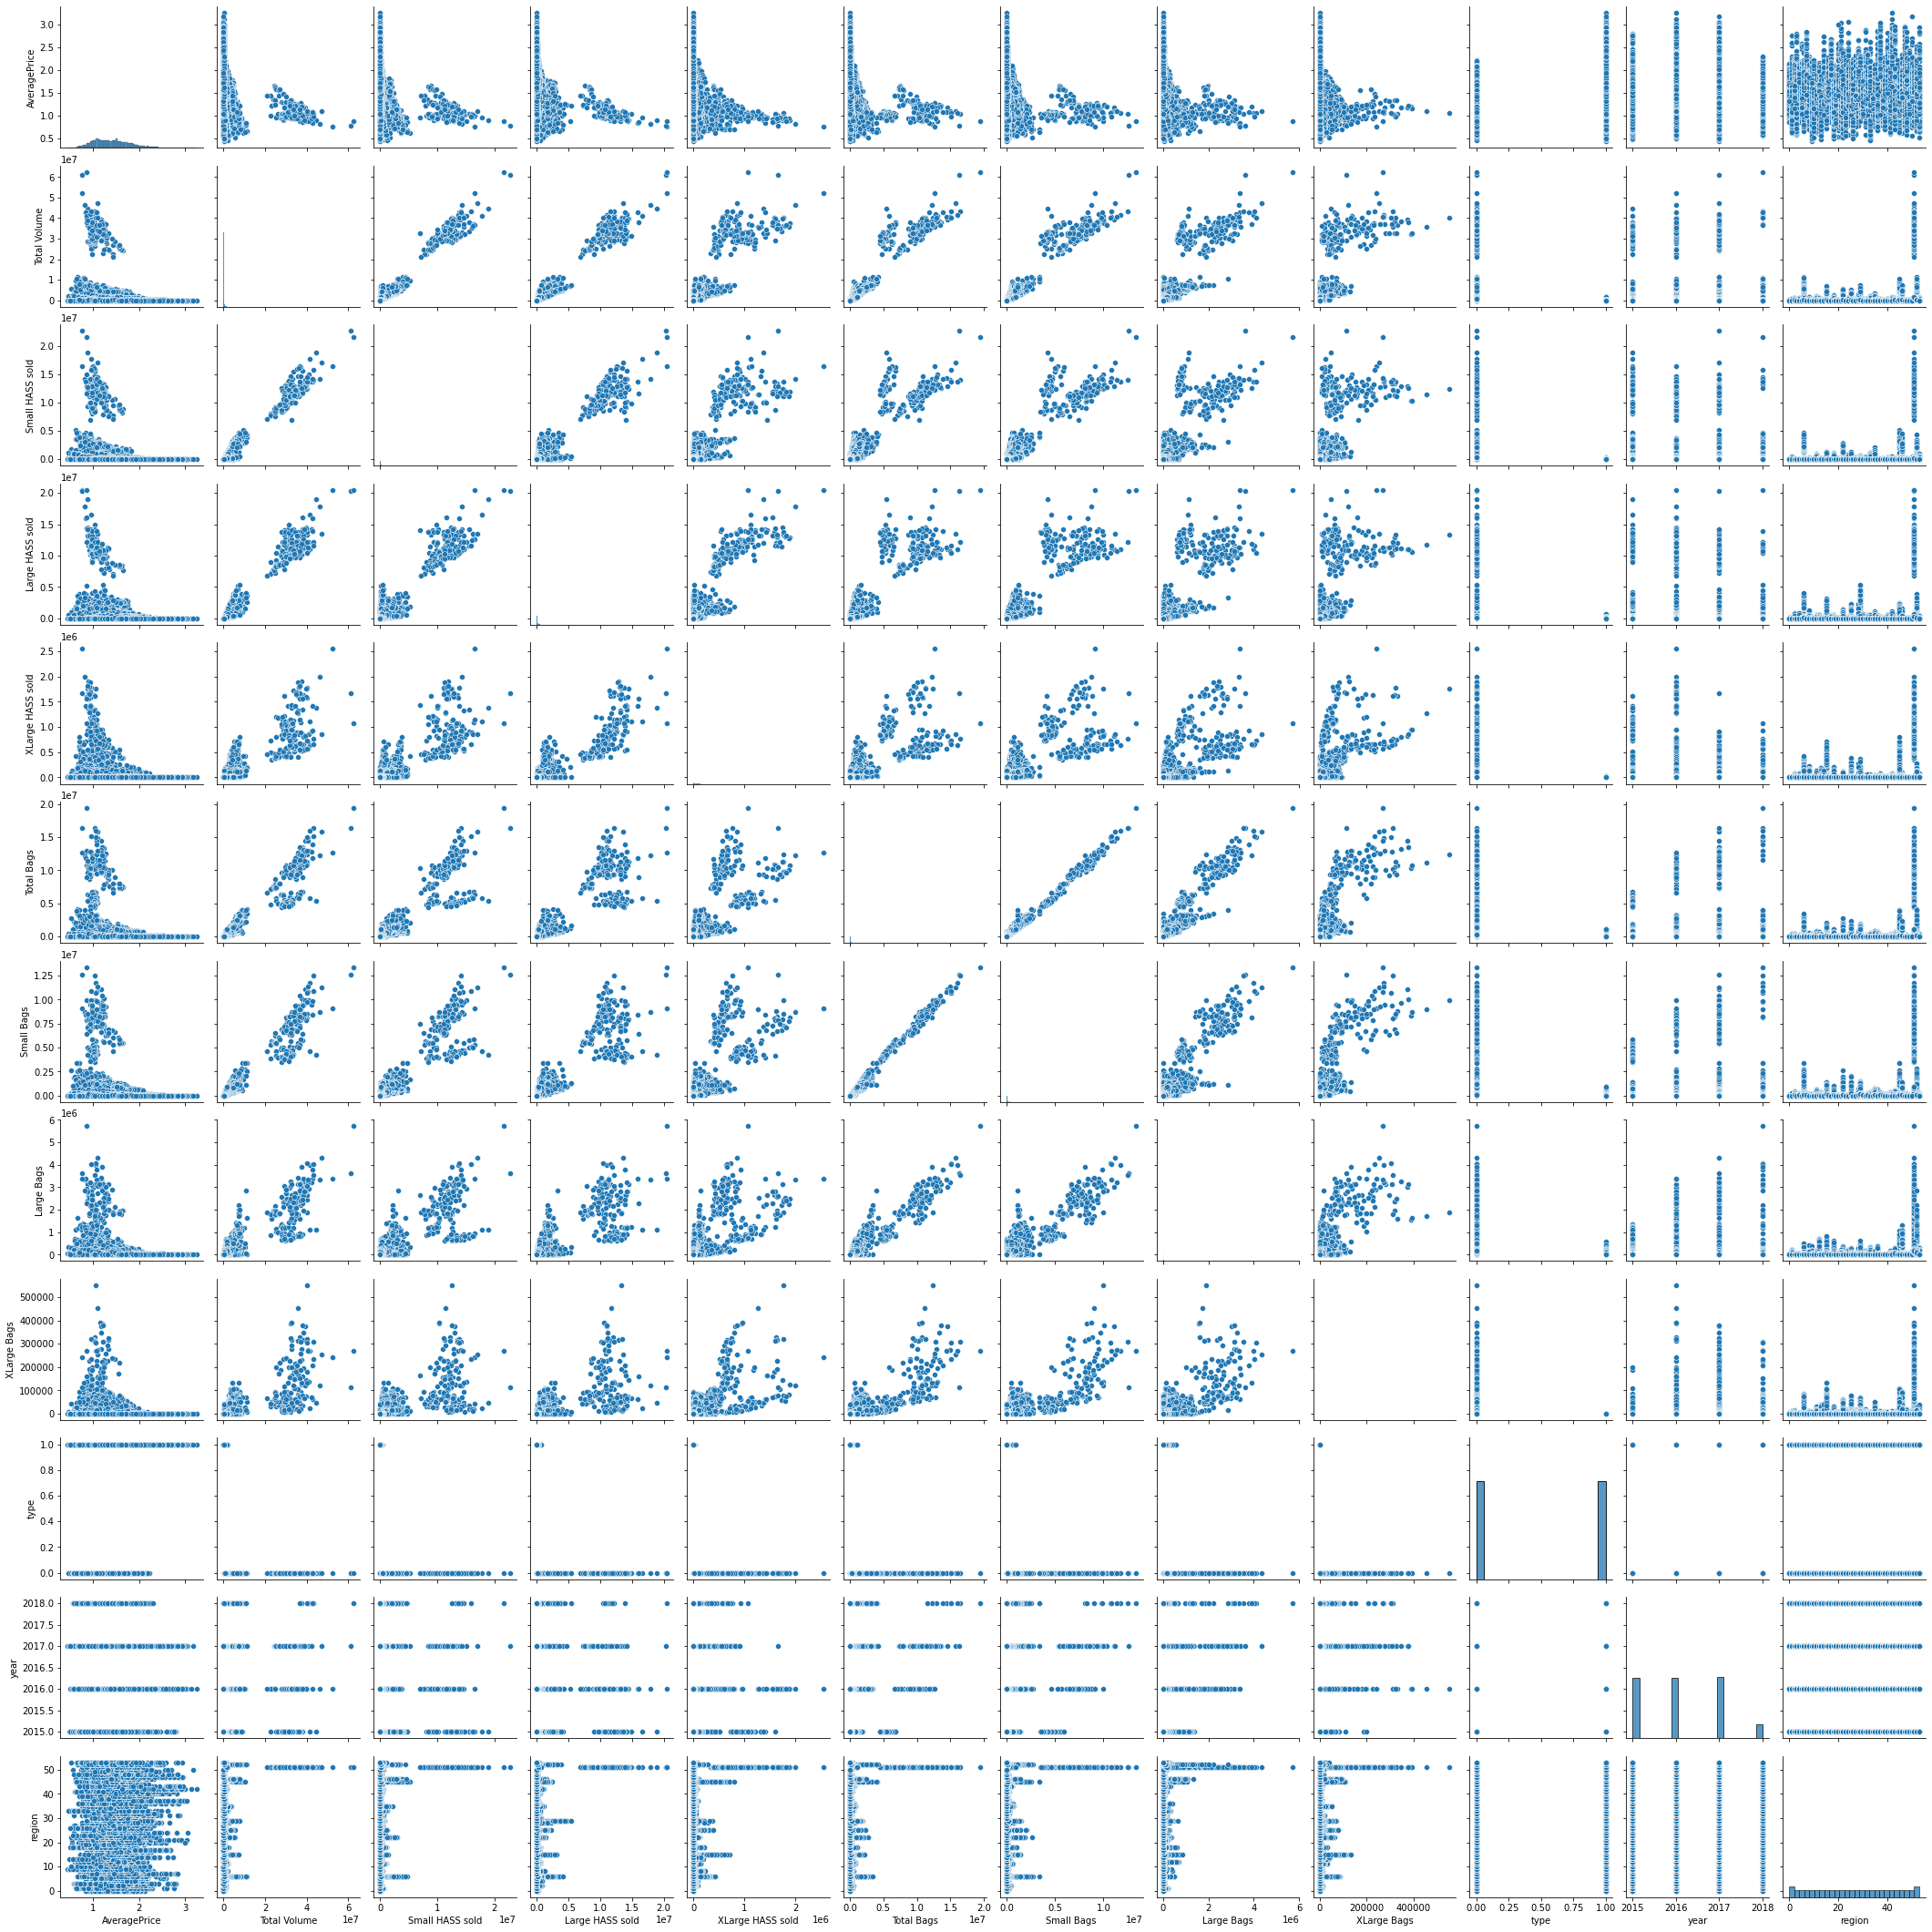

In [8]:
sns.pairplot(av)
plt.show()

# Correlation:-

In [9]:
# 1. Checking the Correlation with respect to target variable(AveragePrice):-

av.corr()['AveragePrice'].sort_values()

Small HASS sold    -0.208317
Total Volume       -0.192752
XLarge HASS sold   -0.179446
Total Bags         -0.177088
Small Bags         -0.174730
Large Bags         -0.172940
Large HASS sold    -0.172928
XLarge Bags        -0.117592
region             -0.011716
year                0.093197
type                0.615845
AveragePrice        1.000000
Name: AveragePrice, dtype: float64

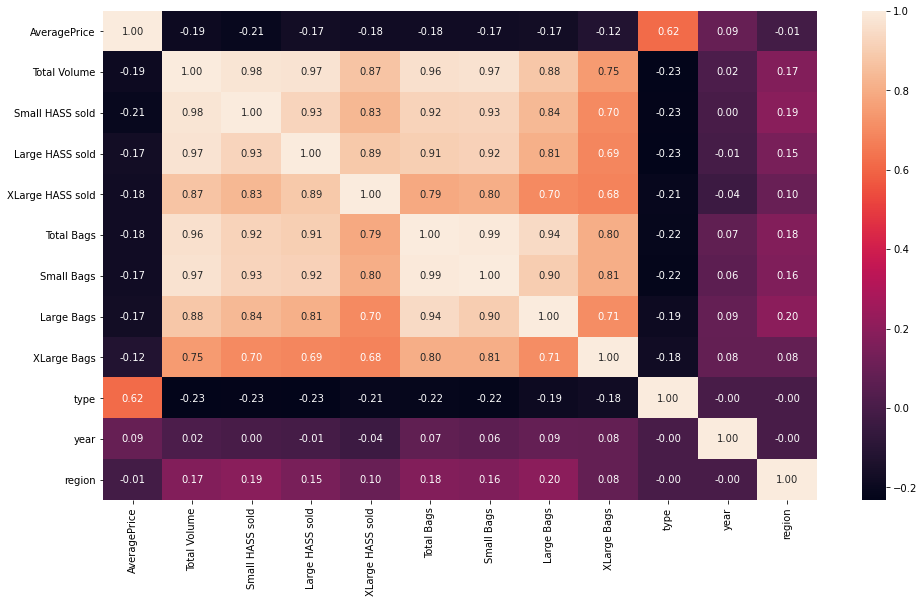

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(av.corr(),annot=True,fmt='0.2f')
plt.show()

 Therefore, the heatmap shows 'year','XLarge HASS sold' are less correlated with the target variable.

Now we can see some mild correlation with Average price and region.

In [11]:
# 2. Checking the Correlation with respect to target variable(region):-

av.corr()['region'].sort_values()

AveragePrice       -0.011716
type               -0.000280
year               -0.000055
XLarge Bags         0.082281
XLarge HASS sold    0.095252
Large HASS sold     0.145726
Small Bags          0.164702
Total Volume        0.174176
Total Bags          0.175256
Small HASS sold     0.192073
Large Bags          0.198768
region              1.000000
Name: region, dtype: float64

Therefore, the heatmap shows 'type','year' are less correlated with the target variable.

Type of avocado vs Average price:-

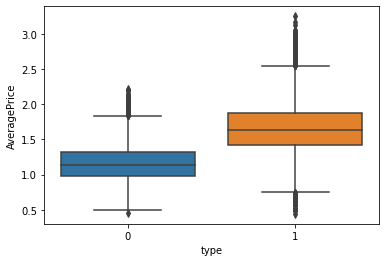

In [14]:
sns.boxplot(x="type", y="AveragePrice", data=av)
plt.show()

Organic avocados are more expensive than conventional ones.

How Average price varies over years:-

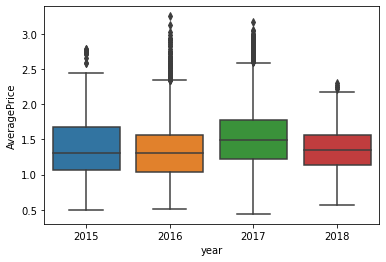

In [15]:
sns.boxplot(x="year", y="AveragePrice", data=av)
plt.show()

We notice the average price was high in 2017 compared to other years.

How Average price varies across regions:-

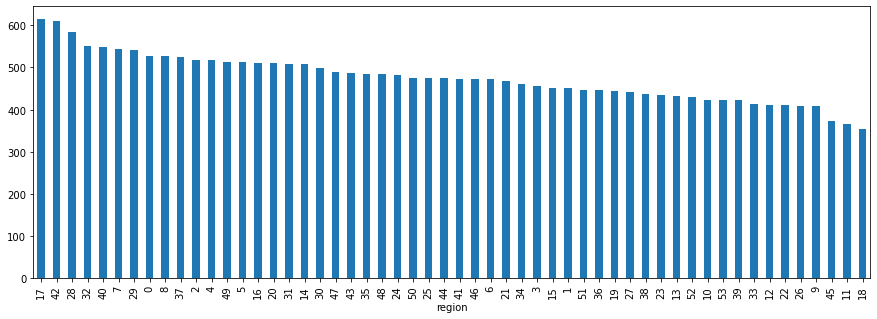

In [17]:
av.groupby("region")["AveragePrice"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.show()

AveragePrice varies with region. Price of avocado varies from one region to another – with HartfordSpringfield being highest and Houston being lowest price to get cheap Avocado.

Making new dataframe in terms of Average price analysis:-

In [12]:
av1=av.drop(['year','region','Date'],axis=1)
av1

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1


In [11]:
av1.shape

(18249, 10)

In [13]:
av1.skew()

AveragePrice         0.580303
Total Volume         9.007687
Small HASS sold      8.648220
Large HASS sold      8.942466
XLarge HASS sold    10.159396
Total Bags           9.756072
Small Bags           9.540660
Large Bags           9.796455
XLarge Bags         13.139751
type                 0.000329
dtype: float64

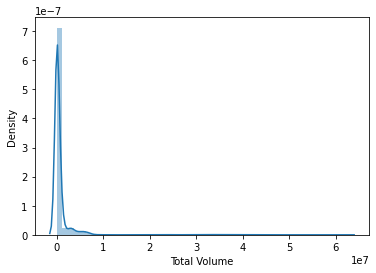

In [32]:
# checking with the distribution curve:-

sns.distplot(av1['Total Volume'])
plt.show()

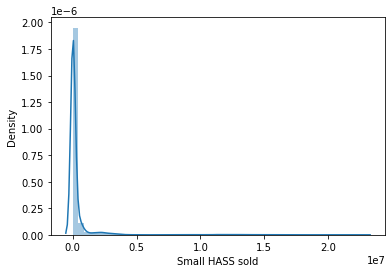

In [33]:
sns.distplot(av1['Small HASS sold'])
plt.show()

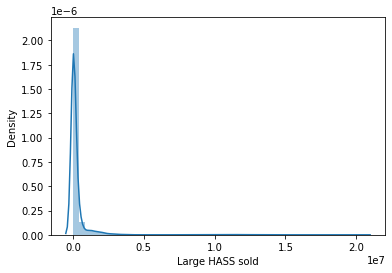

In [34]:
sns.distplot(av1['Large HASS sold'])
plt.show()

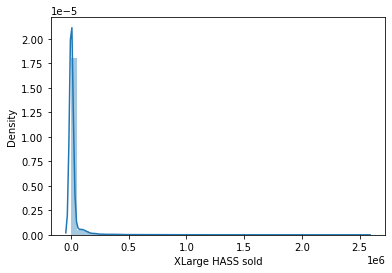

In [35]:
sns.distplot(av1['XLarge HASS sold'])
plt.show()

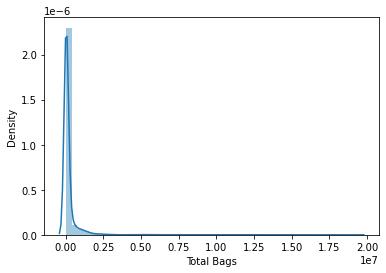

In [36]:
sns.distplot(av1['Total Bags'])
plt.show()

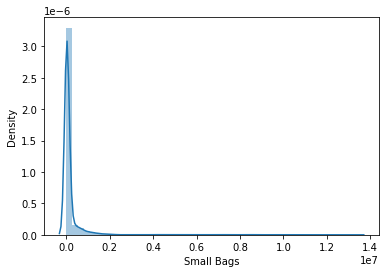

In [37]:
sns.distplot(av1['Small Bags'])
plt.show()

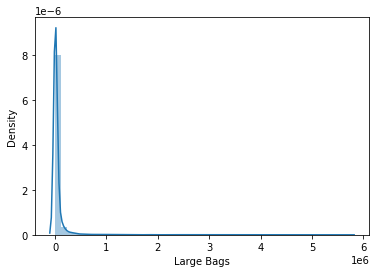

In [38]:
sns.distplot(av1['Large Bags'])
plt.show()

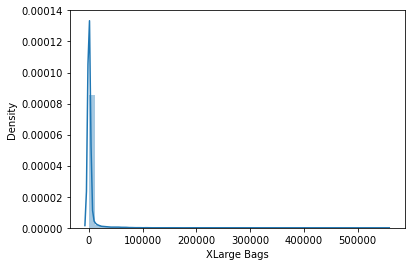

In [39]:
sns.distplot(av1['XLarge Bags'])
plt.show()

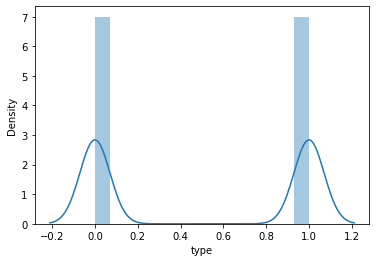

In [40]:
sns.distplot(av1['type'])
plt.show()

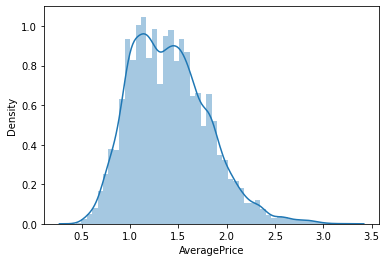

In [41]:
sns.distplot(av1['AveragePrice'])
plt.show()

Above visualizations shows that the is not normalized and very highly skewed.
The building blocks is out of normalized curve.

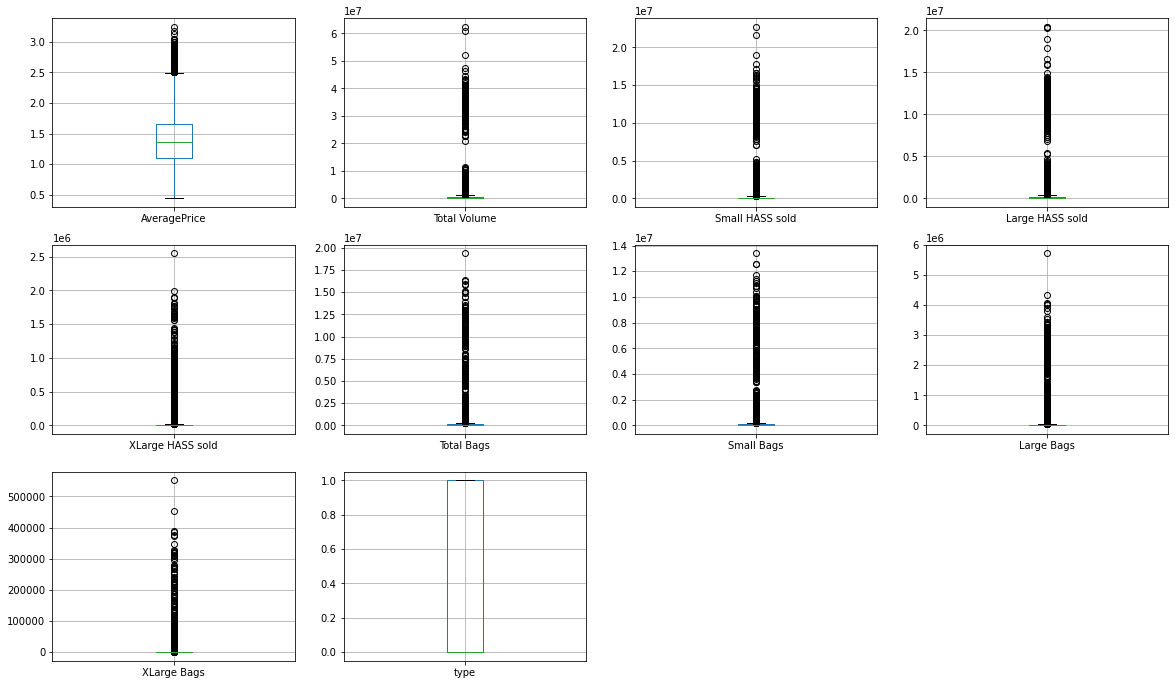

In [14]:
# Outliers Removal:-

av1.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [15]:
from scipy.stats import zscore
z=np.abs(zscore(av1))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 0.22235202, 0.17557961,
        0.99983562],
       [0.13901962, 0.23042664, 0.23110251, ..., 0.22233464, 0.17557961,
        0.99983562],
       [1.18206895, 0.21208462, 0.23100731, ..., 0.22231148, 0.17557961,
        0.99983562],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 0.22256082, 0.17557961,
        1.00016441],
       [1.30138182, 0.24162464, 0.2304279 , ..., 0.2225293 , 0.17557961,
        1.00016441],
       [0.53151208, 0.24125273, 0.22934712, ..., 0.22262764, 0.17557961,
        1.00016441]])

In [16]:
# index no.

np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [17]:
av1_new=av1[(z<3).all(axis=1)]
av1_new

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1


In [17]:
av1.shape

(18249, 10)

In [18]:
av1_new.shape

(17651, 10)

In [49]:
# percentage data loss:-

loss_percent=(18249-17651)/(18249*100)
print(loss_percent,'%')

0.0003276891884486821 %


In [18]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X1=power_transform(av1,method='yeo-johnson')
X1

array([[-0.08624822, -0.08660524, -0.65861896, ..., -0.77335071,
        -0.69984934, -0.99983562],
       [-0.03402196, -0.15574567, -0.77686953, ..., -0.76343481,
        -0.69984934, -0.99983562],
       [-1.27393796,  0.17932662, -0.73194656, ..., -0.75081989,
        -0.69984934, -0.99983562],
       ...,
       [ 1.14779044, -0.77150535, -0.61983119, ..., -0.94348631,
        -0.69984934,  1.00016441],
       [ 1.2658763 , -0.69807719, -0.55028196, ..., -0.90851023,
        -0.69984934,  1.00016441],
       [ 0.61828746, -0.66380937, -0.36790819, ..., -1.0422502 ,
        -0.69984934,  1.00016441]])

In [19]:
X1.ndim

2

In [20]:
X1.std()

0.9999999999999999

In [19]:
x=av1_new.drop(['AveragePrice'],axis=1)
x

,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1


In [20]:
y=av1_new['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

Making new dataframe in terms of region analysis:-

In [21]:
av2=av.drop(['year','type','Date'],axis=1)
av2

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,53


In [56]:
av2.shape

(18249, 10)

In [22]:
av2.skew()

AveragePrice         0.580303
Total Volume         9.007687
Small HASS sold      8.648220
Large HASS sold      8.942466
XLarge HASS sold    10.159396
Total Bags           9.756072
Small Bags           9.540660
Large Bags           9.796455
XLarge Bags         13.139751
region               0.000030
dtype: float64

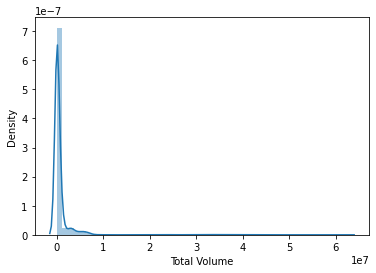

In [58]:
# checking with the distribution curve:-

sns.distplot(av2['Total Volume'])
plt.show()

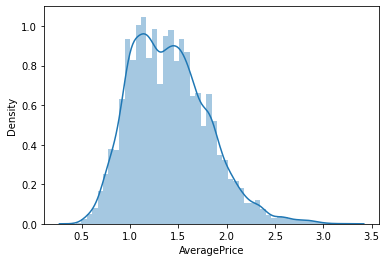

In [59]:
sns.distplot(av2['AveragePrice'])
plt.show()

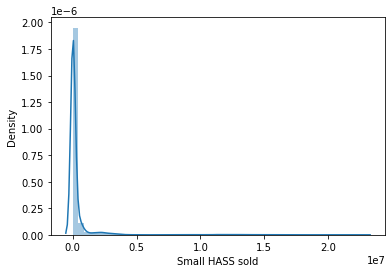

In [60]:
sns.distplot(av2['Small HASS sold'])
plt.show()

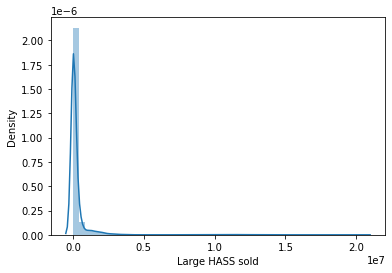

In [61]:
sns.distplot(av2['Large HASS sold'])
plt.show()

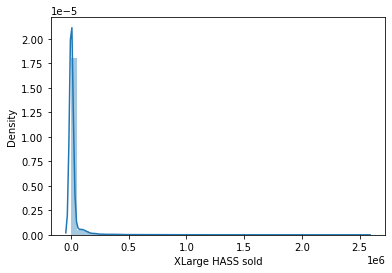

In [62]:
sns.distplot(av2['XLarge HASS sold'])
plt.show()

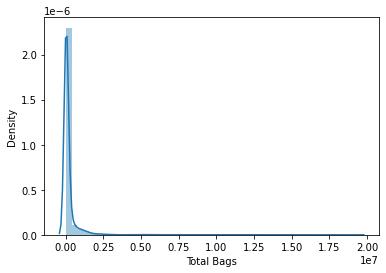

In [63]:
sns.distplot(av2['Total Bags'])
plt.show()

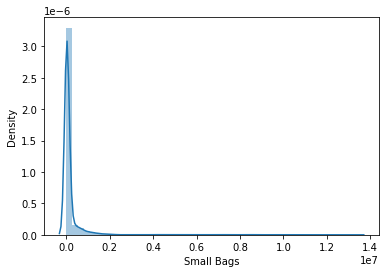

In [64]:
sns.distplot(av2['Small Bags'])
plt.show()

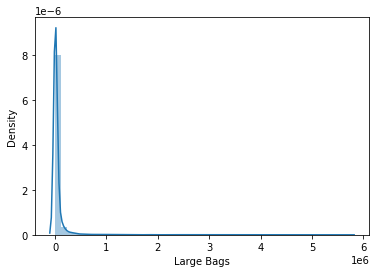

In [65]:
sns.distplot(av2['Large Bags'])
plt.show()

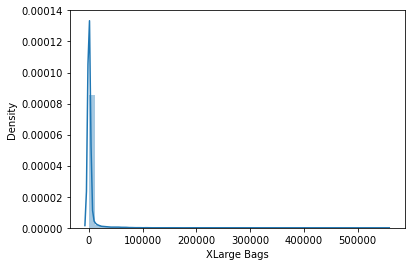

In [67]:
sns.distplot(av2['XLarge Bags'])
plt.show()

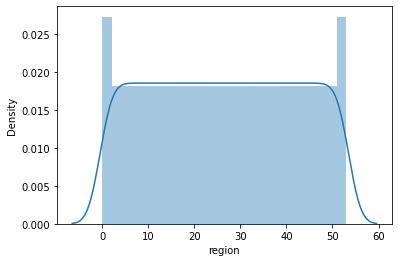

In [68]:
sns.distplot(av2['region'])
plt.show()

Above visualizations shows that the is not normalized and very highly skewed.
The building blocks is out of normalized curve.

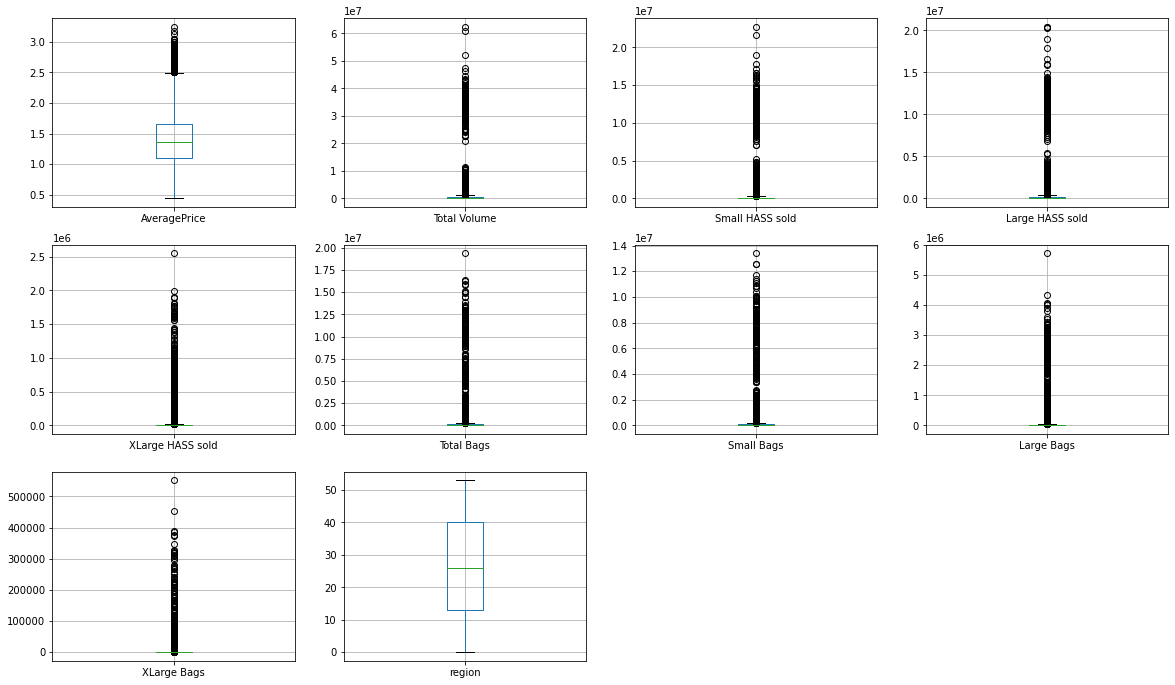

In [23]:
# Outliers Removal:-

av2.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(av2))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 0.22235202, 0.17557961,
        1.7002522 ],
       [0.13901962, 0.23042664, 0.23110251, ..., 0.22233464, 0.17557961,
        1.7002522 ],
       [1.18206895, 0.21208462, 0.23100731, ..., 0.22231148, 0.17557961,
        1.7002522 ],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 0.22256082, 0.17557961,
        1.70081131],
       [1.30138182, 0.24162464, 0.2304279 , ..., 0.2225293 , 0.17557961,
        1.70081131],
       [0.53151208, 0.24125273, 0.22934712, ..., 0.22262764, 0.17557961,
        1.70081131]])

In [25]:
# index no.

np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [26]:
av2_new=av2[(z<3).all(axis=1)]
av2_new

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,53


In [73]:
av2.shape

(18249, 10)

In [74]:
av2_new.shape

(17651, 10)

In [75]:
# percentage data loss:-

loss_percent=(18249-17651)/(18249*100)
print(loss_percent,'%')

0.0003276891884486821 %


In [27]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X2=power_transform(av2,method='yeo-johnson')
X2

array([[-0.08624822, -0.08660524, -0.65861896, ..., -0.77335071,
        -0.69984934, -2.01155231],
       [-0.03402196, -0.15574567, -0.77686953, ..., -0.76343481,
        -0.69984934, -2.01155231],
       [-1.27393796,  0.17932662, -0.73194656, ..., -0.75081989,
        -0.69984934, -2.01155231],
       ...,
       [ 1.14779044, -0.77150535, -0.61983119, ..., -0.94348631,
        -0.69984934,  1.54383806],
       [ 1.2658763 , -0.69807719, -0.55028196, ..., -0.90851023,
        -0.69984934,  1.54383806],
       [ 0.61828746, -0.66380937, -0.36790819, ..., -1.0422502 ,
        -0.69984934,  1.54383806]])

In [29]:
X2.ndim

2

In [30]:
X2.std()

1.0

In [28]:
x1=av2_new.drop(['region'],axis=1)
x1

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0


In [29]:
y1=av2_new['region']
y1

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17651, dtype: int32

# Machine Learning Algorithms Training and Testing of AveragePrice:-

Preprocessing:-

In [27]:
import sklearn
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as mse,mean_absolute_error as mae

In [29]:
# linear Regression;

lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    train_accuracy=r2_score(y_train,pred_train)
    test_accuracy=r2_score(y_test,pred_test)
    print("At random state train",{i},train_accuracy)
    print("At random state test",{i},test_accuracy)
    print("\n")
    print('Mean-squared-error: ',mse(y_test,pred_test))
    print('Mean-absolute-error: ',mae(y_test,pred_test))
    print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_test)))
    print('R2 SCore: ',r2_score(y_test,pred_test))

At random state train {0} 0.4078721508886046
At random state test {0} 0.3914255546906311


Mean-squared-error:  0.09120189927747974
Mean-absolute-error:  0.23538937888095562
Root-Mean-squared-error:  0.3019965219625546
R2 SCore:  0.3914255546906311
At random state train {1} 0.4068746521597668
At random state test {1} 0.39538511852476854


Mean-squared-error:  0.09109978318642435
Mean-absolute-error:  0.23608712668336765
Root-Mean-squared-error:  0.3018274062878061
R2 SCore:  0.39538511852476854
At random state train {2} 0.4062174883107029
At random state test {2} 0.3976406236250706


Mean-squared-error:  0.08949973502770604
Mean-absolute-error:  0.23403906430270674
Root-Mean-squared-error:  0.2991650631803554
R2 SCore:  0.3976406236250706
At random state train {3} 0.4021362054246733
At random state test {3} 0.4141265822420601


Mean-squared-error:  0.08657486608333011
Mean-absolute-error:  0.2309769688613793
Root-Mean-squared-error:  0.2942360720294677
R2 SCore:  0.4141265822420601
At 

In [30]:
print('Best accuraccy(R2 Score) is ',0.436, 'on random_state',7)

Best accuraccy(R2 Score) is  0.436 on random_state 7


In [31]:
# Choosing the best random state in linear regression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=7)

In [32]:
# Linear Regression;

lr=LinearRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("R2 Score",r2_score(y_test,predlr)*100)
print('Mean-squared-error: ',mse(y_test,predlr))
print('Mean-absolute-error: ',mae(y_test,predlr))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,predlr)))

R2 Score 42.097666590461
Mean-squared-error:  0.08723666965125365
Mean-absolute-error:  0.2299617938943069
Root-Mean-squared-error:  0.2953585442326896


In [33]:
#lasso regression;


from sklearn.linear_model import Lasso,Ridge
 
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
print("R2 Score",r2_score(y_test,pred_ls)*100)
print('Mean-squared-error: ',mse(y_test,pred_ls))
print('Mean-absolute-error: ',mae(y_test,pred_ls))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_ls)))

R2 Score 42.11048205913409
Mean-squared-error:  0.08721736164169291
Mean-absolute-error:  0.22992868889882698
Root-Mean-squared-error:  0.2953258567103343


In [34]:
# Decision tree regressor;

from sklearn.tree import DecisionTreeRegressor
 
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print("R2 Score",r2_score(y_test,pred_dtr)*100)
print('Mean-squared-error: ',mse(y_test,pred_dtr))
print('Mean-absolute-error: ',mae(y_test,pred_dtr))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_dtr)))

R2 Score 53.75660224057511
Mean-squared-error:  0.06967111299915038
Mean-absolute-error:  0.1744633248371566
Root-Mean-squared-error:  0.26395286132025614


In [35]:
# Random Forest Regressor;

from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("R2 Score",r2_score(y_test,predrf)*100)
print('Mean-squared-error: ',mse(y_test,predrf))
print('Mean-absolute-error: ',mae(y_test,predrf))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,predrf)))

R2 Score 77.05623164541487
Mean-squared-error:  0.03456748325403568
Mean-absolute-error:  0.13066323987538941
Root-Mean-squared-error:  0.18592332627735467


In [36]:
# Ada Boost Regressor;

from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor(n_estimators=100)
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
print("R2 Score",r2_score(y_test,pred_ad)*100)
print('Mean-squared-error: ',mse(y_test,pred_ad))
print('Mean-absolute-error: ',mae(y_test,pred_ad))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_ad)))

R2 Score 46.81470919809551
Mean-squared-error:  0.08012989064145803
Mean-absolute-error:  0.22956893212281826
Root-Mean-squared-error:  0.2830722357304899


Therefore, Random Forest Regressor shows the best metrics results among other models.

In [37]:
# Cross Validation for linear regression;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(lr,x,y,cv=9)
print('Cross validation score of Linear Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,predlr)*100)

Cross validation score of Linear Regression model: [-0.44191578  0.05192331  0.07897103 -0.18729356  0.43940703 -0.00098172
 -0.04538821  0.00064248 -0.03219131]
Mean of Cross validation score: -0.015202970135004983
R2 Score 42.097666590461


In [38]:
# Cross Validation for lasso regression;

cv_score=cross_val_score(ls,x,y,cv=9)
print('Cross validation support vector Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_ls)*100)

Cross validation support vector Regression model: [-4.42877918e-01  5.13005329e-02  7.90957860e-02 -1.83752364e-01
  4.39435991e-01 -9.31517041e-05 -4.51065598e-02  7.57063896e-04
 -3.25005397e-02]
Mean of Cross validation score: -0.0148601287831392
R2 Score 42.11048205913409


In [39]:
# Cross Validation for decision tree regression;

cv_score=cross_val_score(dtr,x,y,cv=9)
print('Cross validation score of decision tree Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_dtr)*100)

Cross validation score of decision tree Regression model: [-1.72583558 -0.2235583  -0.12442649 -0.07459781  0.19544145 -1.18984281
 -0.05315775 -0.09711231 -0.52599787]
Mean of Cross validation score: -0.4243430529873273
R2 Score 53.75660224057511


In [40]:
# Cross Validation for random forest regression;

cv_score=cross_val_score(rf,x,y,cv=9)
print('Cross validation score of random forest Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,predrf)*100)

Cross validation score of random forest Regression model: [-0.05448738  0.33680208  0.34712785  0.21719324  0.58725479  0.09422116
  0.36842516  0.28763264 -0.00996561]
Mean of Cross validation score: 0.24157821371803173
R2 Score 77.05623164541487


In [41]:
# Cross Validation for AdaBoost regression;

cv_score=cross_val_score(ad,x,y,cv=9)
print('Cross validation score of AdaBoost Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_ad)*100)

Cross validation score of AdaBoost Regression model: [-0.97026334 -0.36962046  0.09565484  0.01071447  0.46396841 -0.01622976
 -0.00465306  0.18602046  0.04343334]
Mean of Cross validation score: -0.06233056749958637
R2 Score 46.81470919809551


Therefore the difference between cv score and r2 score in case of Random Forest Regressor that is [0.770-0.587=0.19],So we will choose this model for further process.

# Hyperparameter Tuning:-

In [42]:
RandomForestRegressor()

RandomForestRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[1,2,3,4],
            'max_features':['auto','sqrt','log2'],
            'n_estimators':[100,150,200],
            'criterion':['mse','mae']}
rf= RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

This regression model is not processing since i have tried this 5-6 times and waited for 7-10 hours still is not giving any 
hyperparameter tuning result.

# Machine Learning Algorithms Training and Testing of Region:-

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Best Random State:-

In [41]:

maxAccu=0 # Maximum accuracy
maxRS=0 # best random state value for which max accuracy is achieved

mnb=MultinomialNB()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    mnb.fit(x_train,y_train)
    pred_mnb=mnb.predict(x_test)
    acc=accuracy_score(y_test,pred_mnb)
    print('accuracy',acc,'random_state',i)
    print('\n')
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)

accuracy 0.22798074199943358 random_state 0


max_accuracy 0.22798074199943358 max_random_state 0
accuracy 0.24723874256584538 random_state 1


max_accuracy 0.24723874256584538 max_random_state 1
accuracy 0.22996318323421128 random_state 2


accuracy 0.23845935995468706 random_state 3


accuracy 0.24044180118946473 random_state 4


accuracy 0.2367601246105919 random_state 5


accuracy 0.23251203625035402 random_state 6


accuracy 0.23166241857830644 random_state 7


accuracy 0.2259983007646559 random_state 8


accuracy 0.2214670065137355 random_state 9


accuracy 0.23874256584536957 random_state 10


accuracy 0.2421410365335599 random_state 11


accuracy 0.2356273010478618 random_state 12


accuracy 0.23477768337581423 random_state 13


accuracy 0.24299065420560748 random_state 14


accuracy 0.2336448598130841 random_state 15


accuracy 0.23534409515717927 random_state 16


accuracy 0.2268479184367035 random_state 17


accuracy 0.24157462475219485 random_state 18


accuracy 0.238742565

In [42]:
print('Best accuracy is ',maxAccu,'on Random_state',maxRS)

Best accuracy is  0.2537524780515435 on Random_state 73


In [43]:
# Naive Bayes Classifier;

mnb=MultinomialNB()

mnb.fit(x_train,y_train)
pred_mnb=mnb.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_mnb)*100)
print(confusion_matrix(y_test,pred_mnb))
print(classification_report(y_test,pred_mnb))

Accuracy 23.56273010478618
[[18  0  0 ...  0  0  0]
 [ 1  7  0 ...  2  5  1]
 [ 1  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 22  4  0]
 [ 0  0  0 ... 12  9  0]
 [ 0  0  0 ...  4  3  6]]
              precision    recall  f1-score   support

           0       0.15      0.26      0.19        70
           1       0.29      0.11      0.16        64
           2       0.55      0.40      0.47        52
           3       0.74      0.28      0.40        61
           4       0.38      0.15      0.21        75
           5       0.09      0.56      0.15        59
           6       0.15      0.20      0.17        60
           7       0.59      0.29      0.39        56
           8       0.69      0.49      0.58        69
           9       0.17      0.56      0.26        72
          10       0.23      0.04      0.07        70
          11       0.11      0.13      0.12        68
          12       0.31      0.46      0.37        78
          13       0.72      0.31      0.43        59
      

In [44]:
# Support vector classifier;

from sklearn.svm import SVC
svc=SVC(kernel='rbf')

svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 27.810818465024074
[[ 6  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  2]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  2  0 ...  0  0 24]]
              precision    recall  f1-score   support

           0       1.00      0.09      0.16        70
           1       0.37      0.23      0.29        64
           2       0.85      0.42      0.56        52
           3       0.71      0.08      0.15        61
           4       0.83      0.33      0.48        75
           5       0.14      0.32      0.19        59
           6       0.82      0.53      0.65        60
           7       0.20      0.14      0.17        56
           8       1.00      0.46      0.63        69
           9       0.59      0.26      0.37        72
          10       0.25      0.21      0.23        70
          11       0.65      0.32      0.43        68
          12       0.74      0.36      0.48        78
          13       0.67      0.47      0.55        59
     

In [45]:
# Decision Tree Classifier;

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 77.93826111583121
[[52  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  1]
 [ 0  0 46 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 54  0]
 [ 0  0  0 ...  0  0 47]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        70
           1       0.66      0.61      0.63        64
           2       0.85      0.88      0.87        52
           3       0.81      0.82      0.81        61
           4       0.80      0.84      0.82        75
           5       0.74      0.71      0.72        59
           6       0.95      0.95      0.95        60
           7       0.82      0.84      0.83        56
           8       0.93      0.93      0.93        69
           9       0.76      0.76      0.76        72
          10       0.73      0.64      0.68        70
          11       0.95      0.78      0.85        68
          12       0.83      0.86      0.84        78
          13       0.67      0.71      0.69        59
      

In [46]:
# Random Forest Classifier;

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 89.37977909940527
[[57  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  0]
 [ 0  0 51 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  0  0 ...  0  0 54]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        70
           1       0.83      0.78      0.81        64
           2       0.98      0.98      0.98        52
           3       0.89      0.92      0.90        61
           4       0.85      0.89      0.87        75
           5       0.81      0.88      0.85        59
           6       0.97      1.00      0.98        60
           7       0.96      0.95      0.95        56
           8       0.99      1.00      0.99        69
           9       0.91      0.89      0.90        72
          10       0.87      0.89      0.88        70
          11       0.94      0.96      0.95        68
          12       0.97      0.92      0.95        78
          13       0.84      0.90      0.87        59
      

In [47]:
# Ada Boost Classifier;

from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_ad)*100)
print(confusion_matrix(y_test,pred_ad))
print(classification_report(y_test,pred_ad))

Accuracy 5.862361937128292
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  5  0  3]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ... 25  0  0]
 [ 0  0  0 ... 18  0 11]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.00      0.00      0.00        64
           2       0.00      0.00      0.00        52
           3       0.00      0.00      0.00        61
           4       0.00      0.00      0.00        75
           5       0.00      0.00      0.00        59
           6       0.00      0.00      0.00        60
           7       0.04      1.00      0.08        56
           8       0.00      0.00      0.00        69
           9       0.00      0.00      0.00        72
          10       0.00      0.00      0.00        70
          11       0.07      0.21      0.11        68
          12       0.00      0.00      0.00        78
          13       0.03      0.47      0.06        59
      

Therefore, Random Forest Classifier shows the best metrics results among other models.

In [48]:
# Cross Validation for Naive Bayes Classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(mnb,x_train,y_train,cv=9)
print('Cross validation score of Logistic Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_mnb)*100)

Cross validation score of Logistic Regression model: [0.22434672 0.24856597 0.24410453 0.22689611 0.24028043 0.24729127
 0.22753346 0.22115997 0.22895408]
Mean of Cross validation score: 0.23434805991655214
Accuracy 23.56273010478618


In [49]:
# Cross Validation for  support vector classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(svc,x_train,y_train,cv=9)
print('Cross validation score of Support Vector Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predsvc)*100)

Cross validation score of Support Vector Classifier model: [0.24665392 0.28871893 0.26768642 0.27278521 0.26577438 0.26067559
 0.24920331 0.26832377 0.23852041]
Mean of Cross validation score: 0.2620379945052166
Accuracy 27.810818465024074


In [50]:
# Cross Validation for decision tree classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(dt,x_train,y_train,cv=9)
print('Cross validation score of Decision Tree Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,preddt)*100)

Cross validation score of Decision Tree Classifier model: [0.76609305 0.78075207 0.77246654 0.77182919 0.76991714 0.76290631
 0.78266412 0.76736775 0.76785714]
Mean of Cross validation score: 0.7713170354183739
Accuracy 77.93826111583121


In [51]:
# Cross Validation for Random Forest classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(rf,x_train,y_train,cv=9)
print('Cross validation score of Random Forest Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predrf)*100)

Cross validation score of Random Forest Classifier model: [0.87507967 0.88081581 0.89483748 0.88145315 0.87507967 0.8833652
 0.88017846 0.88718929 0.88392857]
Mean of Cross validation score: 0.882436366303479
Accuracy 89.37977909940527


In [52]:
# Cross Validation for AdaBoost classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(ad,x_train,y_train,cv=9)
print('Cross validation score of AdaBoost Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_ad)*100)

Cross validation score of AdaBoost Classifier model: [0.07010835 0.06564691 0.06309751 0.05927342 0.06500956 0.06692161
 0.07903123 0.04780115 0.07015306]
Mean of Cross validation score: 0.0652269777679502
Accuracy 5.862361937128292


Therefore the difference between cv score and r2 score in very less in case of Random Forest Classifier that is[0.893-0.887=0.006],So we will choose this model for further process.

# Hyperparameter Tuning:-

In [53]:
RandomForestClassifier()

RandomForestClassifier()

In [54]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8],
            'criterion':['gini','entropy'],
            'n_estimators':[100,200,300,400,500]}

In [55]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                 param_grid=parameters,cv=8,
                scoring=accuracy_score)

In [ ]:
GCV.fit(x_train,y_train)
GCV.best_params_

In [ ]:
rf=RandomForestClassifier(criterion='',max_depth=,max_features='',n_estimators=)
rf.fit(x_train,y_train)
train_accuracy=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print(train_accuracy)
accuracy=accuracy_score(y_test,pred_decision)
print('Accuracy_Score',accuracy)
rfs=cross_val_score(rf,x_traint,y_traint,cv=5)
rfc=rf.score(x_train,y_train)
print('Cross_Val_Score',rfc*100)

In [ ]:
GCV.best_estimator_

This classification model is not processing since i have tried this 5-6 times and waited for 7-10 hours still is not giving any 
hyperparameter tuning result.